# Optimising

Finding the values which return maxima or minima of a function

Lots of ML training is optimising a model structure. eg: find regression weights, finding clusters

Lots of algos for this which SciPy provides. Don't need to code too much yourself: just apply them

Lots of things can be framed as an optimisation problem




Very applicable to transport, eg:

1. How do we maximise connectivity given a certain amount of money, with 1000 possible policy inputs and levers?

2. Traveling Salesman: route scheduling for 1000's of customers

3. Tune the NTM parameters



Very applicable to other things:

1. Portfolio optimisation, given expected returns, volatility and correlaton of assets






>Minimise

Lots of algorithm options eg, BFGS algorithm

For mathematically solvable things




>Basin Hopping, Simulated Annealing

Find the global minimum of a function using the basin-hopping algorithm

Good where you have no way of getting the perfect values via formulae: it's a heuristic








# Minimise

<AxesSubplot:xlabel='x1', ylabel='y'>

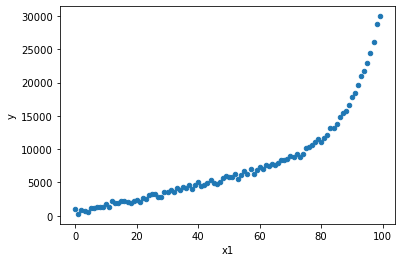

In [43]:

import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt


# make random data
x1 = np.arange(0,100,1)
x2 = np.random.randint(0,10,100)
y = np.arange(0,10000,100) + np.random.randint(0,1000,100) + np.exp(x1/10)


pd.DataFrame({'x1':x1,'y':y}).plot.scatter(x='x1',y='y')



In [45]:

# assume we know rough form of data and it is this
def main_func_to_minimise(x1, x2, sensitivity_parameter):
    return x1 + x2 + np.exp(x1 * sensitivity_parameter)


# least sum of squares
def loss_function(x1, x2, y, sensitivity_parameter): 
    return np.sum((y - main_func_to_minimise(x1, x2, sensitivity_parameter))**2)


bounds = [(None, None)]  # no bounds: values can be anything


# find minimal coefs
res = minimize(lambda coeffs: loss_function(x1, x2, y, *coeffs), x0=np.zeros(1), bounds=bounds)


# view fit 
sensitivity_parameter = res.x[0]
res

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


      fun: 2680937847.8055773
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.61254824e+11])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 2
     njev: 9
   status: 0
  success: True
        x: array([0.10342859])

# Basin Hopping

Good when a more complex landscape: lots of local optima

Good heuristic: rule of thumb to get roughly right thing when getting exactly right thing would take too long

If finding TSP for 100 people, how many combinations of routes are there? 99!. Can't calculate that by brute force

Very similar to genetic algorithms, which you may have heard of 'differential_evolution' in scipy.optimise



## In 1d

![image.png](https://miro.medium.com/max/1400/1*QohZrdOTm96g2trVYysm9w.png)

## In 2d

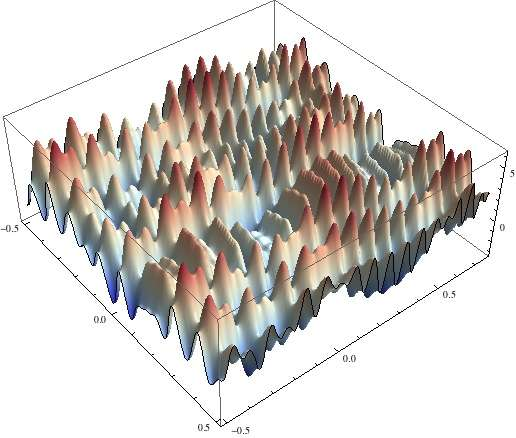


Can be in many higher dimensions



In [54]:
from scipy.optimize import basinhopping


def main_func_to_minimise(x1, x2, sensitivity_parameter):
    return x1 + x2 + np.exp(x1 * sensitivity_parameter)


# least sum of squares
def loss_function(sensitivity_parameter): 
    return np.sum((y - main_func_to_minimise(x1, x2, sensitivity_parameter))**2)


ret = basinhopping(loss_function, 0.0001, niter=200)


ret




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/opt/conda/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys


                        fun: 2236702201.8694186
 lowest_optimization_result:       fun: 2236702201.8694186
 hess_inv: array([[7.454519e-15]])
      jac: array([1003968.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 83
      nit: 3
     njev: 36
   status: 2
  success: False
        x: array([0.10637753])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 72
                       nfev: 15942
                        nit: 200
                       njev: 7735
                          x: array([0.10637753])